Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area. The following outlines what you need to do.

# Climate Analysis and Exploration

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Use the provided starter notebook and hawaii.sqlite files to complete your climate analysis and data exploration.


* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.


* Use SQLAlchemy create_engine to connect to your sqlite database.


* Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [1]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Explore the database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Print the column names and types from the station table
station_columns = inspector.get_columns('station')
[f"Name: {x['name']}; Type: {x['type']}" for x in inspector.get_columns('station')]

['Name: id; Type: INTEGER',
 'Name: station; Type: TEXT',
 'Name: name; Type: TEXT',
 'Name: latitude; Type: FLOAT',
 'Name: longitude; Type: FLOAT',
 'Name: elevation; Type: FLOAT']

In [13]:
# Display the first 5 rows from the station table
engine.execute('select * from station limit 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [14]:
# Print the column names and types from the measurement table
measurement_columns = inspector.get_columns('measurement')
[f"Name: {x['name']}; Type: {x['type']}" for x in inspector.get_columns('measurement')]

['Name: id; Type: INTEGER',
 'Name: station; Type: TEXT',
 'Name: date; Type: TEXT',
 'Name: prcp; Type: FLOAT',
 'Name: tobs; Type: FLOAT']

In [15]:
# Display the first 5 rows from the measurement table
engine.execute('select * from measurement limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

## Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.


* Select only the date and prcp values.


* Load the query results into a Pandas DataFrame and set the index to the date column.


* Sort the DataFrame values by date.


* Plot the results using the DataFrame plot method.


* Use Pandas to print the summary statistics for the precipitation data.

In [16]:
# Determine the last date of measurement table
measurement_last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
measurement_last_date

('2017-08-23')

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
measurement_year = session.query(Measurement.date, Measurement.prcp).filter((Measurement.date >= '2016-08-23') & (Measurement.date <= '2017-08-23')).order_by(Measurement.date.asc()).all()
measurement_year

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [18]:
# Calculate the date 1 year ago from the last data point in the database
measurement_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
measurement_year_ago

datetime.date(2016, 8, 23)

In [19]:
# Perform a query to retrieve the data and precipitation scores
measurement_date_score = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.asc()).all()
measurement_date_score

[('2010-01-01', 0.08),
 ('2010-01-01', 0.28),
 ('2010-01-01', 0.21),
 ('2010-01-01', 0.15),
 ('2010-01-01', 0.15),
 ('2010-01-01', 0.05),
 ('2010-01-01', 0.14),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.02),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.01),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.02),
 ('2010-01-05', 0.01),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-06', None),
 ('2010-01-06', 0.02),
 ('2010-01-06', 0.11),
 ('2010-01-06', 0.01),
 ('2010-01-06', 0.08),
 ('2010-01-06', 0.36),
 ('2010-01-07', 0.06),
 ('2010-01-07', 0.38),
 ('2010-01-07', None),
 ('2010-01-07', 0.7),
 ('2010-01-0

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(measurement_date_score).dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df

,prcp
date,
2010-01-01,0.08
2010-01-01,0.28
2010-01-01,0.21
2010-01-01,0.15
2010-01-01,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [21]:
# Sort the dataframe by date
df_year = pd.DataFrame(measurement_year).dropna()
df_year['date'] = pd.to_datetime(df_year['date'])
df_year = df_year.set_index('date')
df_year

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [22]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2021 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
prcp    2021 non-null float64
dtypes: float64(1)
memory usage: 31.6 KB


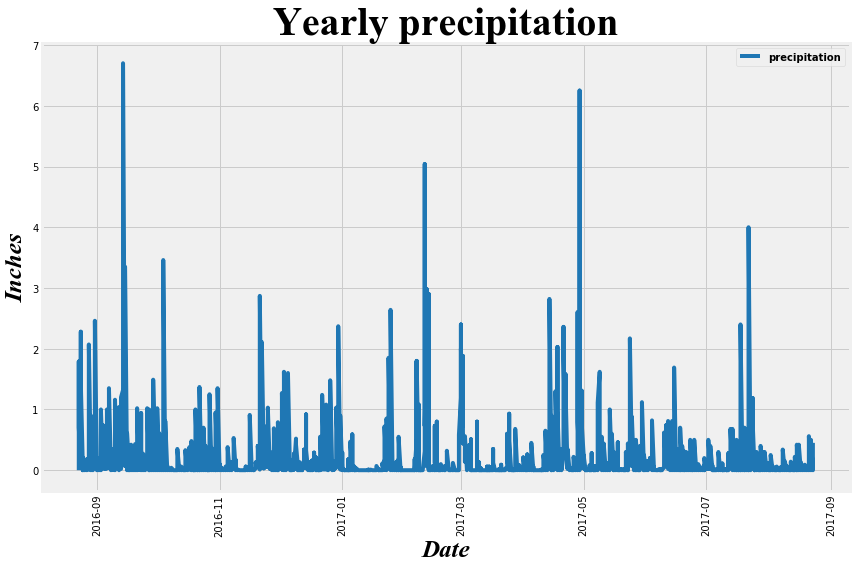

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (12,8))
plt.plot(df_year,color ='tab:blue')
plt.xticks(rotation = 'vertical',fontsize = 10)
plt.yticks(np.arange(0,8,step = 1),fontsize = 10)
plt.title('Yearly precipitation',fontsize = 40, family = 'Times New Roman')
plt.xlabel('Date',style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.ylabel('Inches',style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.legend(['precipitation'],loc = 'best',prop = {'size': 10,'weight':'bold'})
plt.tight_layout()
plt.savefig('Precipitation_analysis.png')
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_year.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

* Design a query to calculate the total number of stations.


* Design a query to find the most active stations.


List the stations and observation counts in descending order.


Which station has the highest number of observations?


Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.


* Design a query to retrieve the last 12 months of temperature observation data (TOBS).


Filter by the station with the highest number of observations.


Plot the results as a histogram with bins=12.

In [25]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement.station).distinct().count()
print(f'There are {station_count} stations in Hawaii.')

There are 9 stations in Hawaii.


In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_active = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Determine the highest count station
highest_station_active = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
highest_station_active

('USC00519281', 2772)

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temperatures = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == highest_station_active.station).all()
temperatures

[(54.0, 85.0, 71.66378066378067)]

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
highest_temperatures = session.query(Measurement.tobs).filter(Measurement.station == highest_station_active.station).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date.desc()).all()
highest_temperatures_df = pd.DataFrame(highest_temperatures)
highest_temperatures_df

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0
...,...
347,75.0
348,80.0
349,80.0
350,77.0


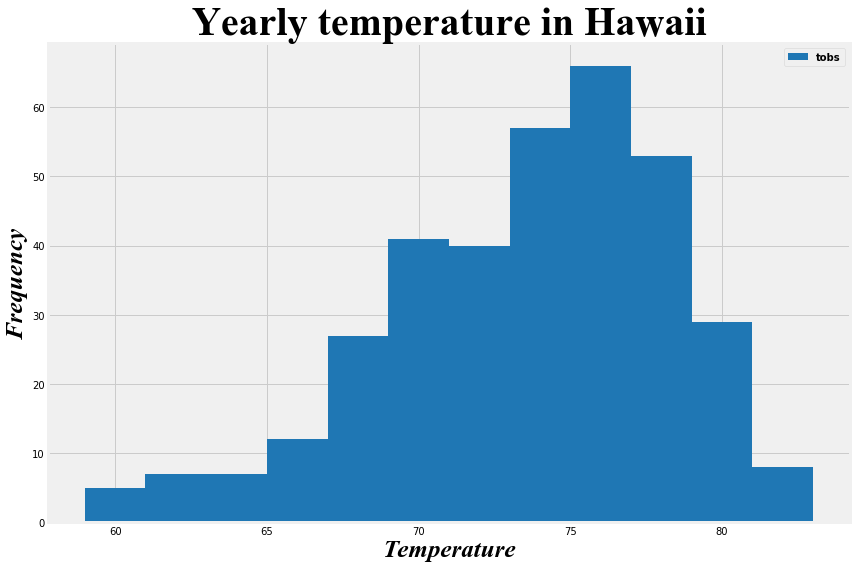

In [30]:
# Plot the results as a histogram
highest_temperatures_df.plot.hist(bins = 12,figsize = (12,8),color = 'tab:blue')
plt.xticks(fontsize = 10)
plt.yticks(np.arange(0,70,step = 10),fontsize = 10)
plt.title("Yearly temperature",fontsize = 40, family = 'Times New Roman')
plt.xlabel("Temperature",style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.ylabel("Frequency",style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.legend(['tobs'],loc = 'best',prop = {'size': 10,'weight':'bold'})
plt.tight_layout()
plt.savefig('Station_analysis.png')
plt.show()

# Bonus Challenge Assignment

## Temperature Analysis

* Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?


* You may either use SQLAlchemy or pandas's read_csv() to perform this portion.


* Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.


* Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?


* The starter notebook contains a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d. The function will return the minimum, average, and maximum temperatures for that range of dates.


* Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").


* Plot the min, avg, and max temperature from your previous query as a bar chart.


Use the average temperature as the bar height.


Use the peak-to-peak (TMAX-TMIN) value as the y error bar (YERR).

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_trip_date, end_trip_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_trip_date).filter(Measurement.date <= end_trip_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# 10 days trip to Hawaii
start_trip_date = '2016-09-01'
end_trip_date = '2016-09-10'
hawaii_trip = calc_temps(start_trip_date, end_trip_date)
hawaii_trip

[(73.0, 77.86666666666666, 84.0)]

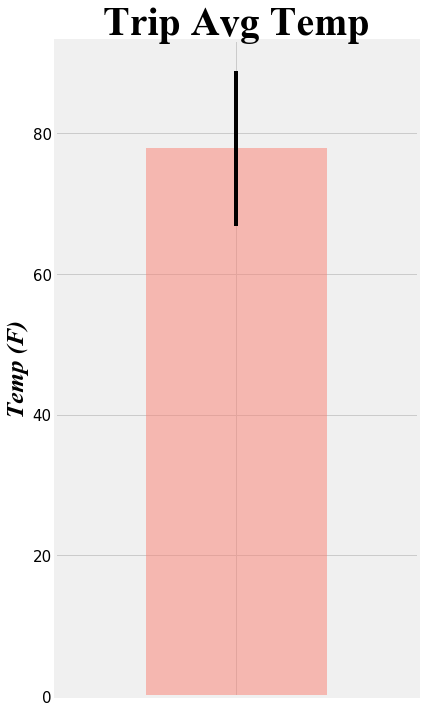

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
hawaii_trip_df = pd.DataFrame(hawaii_trip, columns = ['TMIN', 'TAVG', 'TMAX'])
average_temperature = hawaii_trip_df['TAVG']
peak_to_peak = hawaii_trip_df.iloc[0]['TMAX'] - hawaii_trip_df.iloc[0]['TMIN']
average_temperature.plot.bar(yerr = peak_to_peak, figsize = (6,10), alpha = 0.5, color = 'salmon')
plt.title('Trip Avg Temp',fontsize = 40, family = 'Times New Roman')
plt.ylabel('Temp (F)',style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.yticks(np.arange(0,100,step = 20),fontsize = 15)
plt.tick_params(axis = ('x'), labelbottom = False)
plt.tight_layout()
plt.savefig('Temperature_analysis.png')
plt.show()

## Daily Rainfall Average

* Calculate the rainfall per weather station using the previous year's matching dates.


* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.


* You are provided with a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic TOBS that match that date string.


* Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.


* Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.


* Use Pandas to plot an area plot (stacked=False) for the daily normals.

In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_rainfall_station = session.query(Measurement.station,Station.name,Measurement.prcp,Station.latitude,Station.longitude,Station.elevation).group_by(Measurement.station).join(Station, Measurement.station == Station.station).filter(Measurement.date >= start_trip_date).filter(Measurement.date <= end_trip_date).order_by(Measurement.prcp).all()
trip_rainfall_station_df = pd.DataFrame(trip_rainfall_station)
trip_rainfall_station_df

,station,name,prcp,latitude,longitude,elevation
0,USC00517948,"PEARL CITY, HI US",NaN,21.39340,-157.97510,11.9
1,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",NaN,21.33556,-157.71139,19.5
2,USC00513117,"KANEOHE 838.1, HI US",0.00,21.42340,-157.80150,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.00,21.52130,-157.83740,7.0
4,USC00519397,"WAIKIKI 717.2, HI US",0.00,21.27160,-157.81680,3.0
5,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.01,21.33310,-157.80250,152.4
6,USC00519281,"WAIHEE 837.5, HI US",0.02,21.45167,-157.84889,32.9


In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [36]:
# calculate the daily normals for your trip
trip_day1 = '09-01'
trip_day2 = '09-02'
trip_day3 = '09-03'
trip_day4 = '09-04'
trip_day5 = '09-05'
trip_day6 = '09-06'
trip_day7 = '09-07'
trip_day8 = '09-08'
trip_day9 = '09-09'
trip_day10 = '09-10'
trip_normal_day1 = daily_normals(trip_day1)
trip_normal_day2 = daily_normals(trip_day2)
trip_normal_day3 = daily_normals(trip_day3)
trip_normal_day4 = daily_normals(trip_day4)
trip_normal_day5 = daily_normals(trip_day5)
trip_normal_day6 = daily_normals(trip_day6)
trip_normal_day7 = daily_normals(trip_day7)
trip_normal_day8 = daily_normals(trip_day8)
trip_normal_day9 = daily_normals(trip_day9)
trip_normal_day10 = daily_normals(trip_day10)
trip_normal_min_day1 = trip_normal_day1[0][0]
trip_normal_avg_day1 = trip_normal_day1[0][1]
trip_normal_max_day1 = trip_normal_day1[0][2]
trip_normal_min_day2 = trip_normal_day2[0][0]
trip_normal_avg_day2 = trip_normal_day2[0][1]
trip_normal_max_day2 = trip_normal_day2[0][2]
trip_normal_min_day3 = trip_normal_day3[0][0]
trip_normal_avg_day3 = trip_normal_day3[0][1]
trip_normal_max_day3 = trip_normal_day3[0][2]
trip_normal_min_day4 = trip_normal_day4[0][0]
trip_normal_avg_day4 = trip_normal_day4[0][1]
trip_normal_max_day4 = trip_normal_day4[0][2]
trip_normal_min_day5 = trip_normal_day5[0][0]
trip_normal_avg_day5 = trip_normal_day5[0][1]
trip_normal_max_day5 = trip_normal_day5[0][2]
trip_normal_min_day6 = trip_normal_day6[0][0]
trip_normal_avg_day6 = trip_normal_day6[0][1]
trip_normal_max_day6 = trip_normal_day6[0][2]
trip_normal_min_day7 = trip_normal_day7[0][0]
trip_normal_avg_day7 = trip_normal_day7[0][1]
trip_normal_max_day7 = trip_normal_day7[0][2]
trip_normal_min_day8 = trip_normal_day8[0][0]
trip_normal_avg_day8 = trip_normal_day8[0][1]
trip_normal_max_day8 = trip_normal_day8[0][2]
trip_normal_min_day9 = trip_normal_day9[0][0]
trip_normal_avg_day9 = trip_normal_day9[0][1]
trip_normal_max_day9 = trip_normal_day9[0][2]
trip_normal_min_day10 = trip_normal_day10[0][0]
trip_normal_avg_day10 = trip_normal_day10[0][1]
trip_normal_max_day10 = trip_normal_day10[0][2]

In [37]:
# push each tuple of calculations into a list called `normals`
normals_list = pd.DataFrame({'Trip days':[trip_day1,trip_day2,trip_day3,trip_day4,trip_day5,trip_day6,trip_day7,trip_day8,trip_day9,trip_day10],
                             'Minimum temperature':[trip_normal_min_day1,trip_normal_min_day2,trip_normal_min_day3,trip_normal_min_day4,trip_normal_min_day5,trip_normal_min_day6,trip_normal_min_day7,trip_normal_min_day8,trip_normal_min_day9,trip_normal_min_day10],
                             'Average temperature':[trip_normal_avg_day1,trip_normal_avg_day2,trip_normal_avg_day3,trip_normal_avg_day4,trip_normal_avg_day5,trip_normal_avg_day6,trip_normal_avg_day7,trip_normal_avg_day8,trip_normal_avg_day9,trip_normal_avg_day10],
                             'Maximum temperature':[trip_normal_max_day1,trip_normal_max_day2,trip_normal_max_day3,trip_normal_max_day4,trip_normal_max_day5,trip_normal_max_day6,trip_normal_max_day7,trip_normal_max_day8,trip_normal_max_day9,trip_normal_max_day10]
    })
normals_list

,Trip days,Minimum temperature,Average temperature,Maximum temperature
0,09-01,69.0,77.000000,82.0
1,09-02,67.0,76.666667,83.0
2,09-03,69.0,76.137255,83.0
3,09-04,68.0,76.270833,84.0
4,09-05,66.0,75.914894,84.0
5,09-06,66.0,74.911111,81.0
6,09-07,64.0,75.180000,82.0
7,09-08,66.0,76.222222,83.0
8,09-09,68.0,76.365385,84.0
9,09-10,67.0,76.612245,85.0


In [38]:
# Set the start and end date of the trip
start_trip_date = '2016-09-01'
end_trip_date = '2016-09-10'

In [39]:
# Use the start and end date to create a range of dates
trip_range_date = session.query(Measurement.date).filter(Measurement.date >= start_trip_date).filter(Measurement.date <= end_trip_date).group_by(Measurement.date).all()
trip_range_date

[('2016-09-01'),
 ('2016-09-02'),
 ('2016-09-03'),
 ('2016-09-04'),
 ('2016-09-05'),
 ('2016-09-06'),
 ('2016-09-07'),
 ('2016-09-08'),
 ('2016-09-09'),
 ('2016-09-10')]

In [40]:
# Stip off the year and save a list of %m-%d strings
trip_date = [o[0] for o in trip_range_date]
trip_date_strip= [o[5:] for o in trip_date]
trip_date_strip

['09-01',
 '09-02',
 '09-03',
 '09-04',
 '09-05',
 '09-06',
 '09-07',
 '09-08',
 '09-09',
 '09-10']

In [41]:
start_trip_day = trip_date_strip[0]
end_trip_day = trip_date_strip[-1]

In [42]:
# Loop through the list of %m-%d strings and calculate the normals for each date
day_trip_normals = [session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs))
                    .filter(func.strftime("%m-%d", Measurement.date) >= start_trip_day)
                    .filter(func.strftime("%m-%d", Measurement.date) <= end_trip_day)
                    .group_by(func.strftime("%m-%d", Measurement.date)).all()]
day_trip_normals = day_trip_normals[0]
print("Daily Normals from 09-01 to 09-10")
day_trip_normals

Daily Normals from 09-01 to 09-10


[(69.0, 77.0, 82.0),
 (67.0, 76.66666666666667, 83.0),
 (69.0, 76.13725490196079, 83.0),
 (68.0, 76.27083333333333, 84.0),
 (66.0, 75.91489361702128, 84.0),
 (66.0, 74.91111111111111, 81.0),
 (64.0, 75.18, 82.0),
 (66.0, 76.22222222222223, 83.0),
 (68.0, 76.36538461538461, 84.0),
 (67.0, 76.61224489795919, 85.0)]

In [43]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
day_trip_normals_df= pd.DataFrame(day_trip_normals,columns=['Minimum temperature','Average temperature', 'Maximum temperature'])
day_trip_normals_df['Date']= trip_date
day_trip_normals_df['Date'] = pd.to_datetime(day_trip_normals_df['Date'],format='%Y-%m-%d')
day_trip_normals_df.set_index('Date',inplace=True)
day_trip_normals_df

,Minimum temperature,Average temperature,Maximum temperature
Date,,,
2016-09-01,69.0,77.000000,82.0
2016-09-02,67.0,76.666667,83.0
2016-09-03,69.0,76.137255,83.0
2016-09-04,68.0,76.270833,84.0
2016-09-05,66.0,75.914894,84.0
2016-09-06,66.0,74.911111,81.0
2016-09-07,64.0,75.180000,82.0
2016-09-08,66.0,76.222222,83.0
2016-09-09,68.0,76.365385,84.0


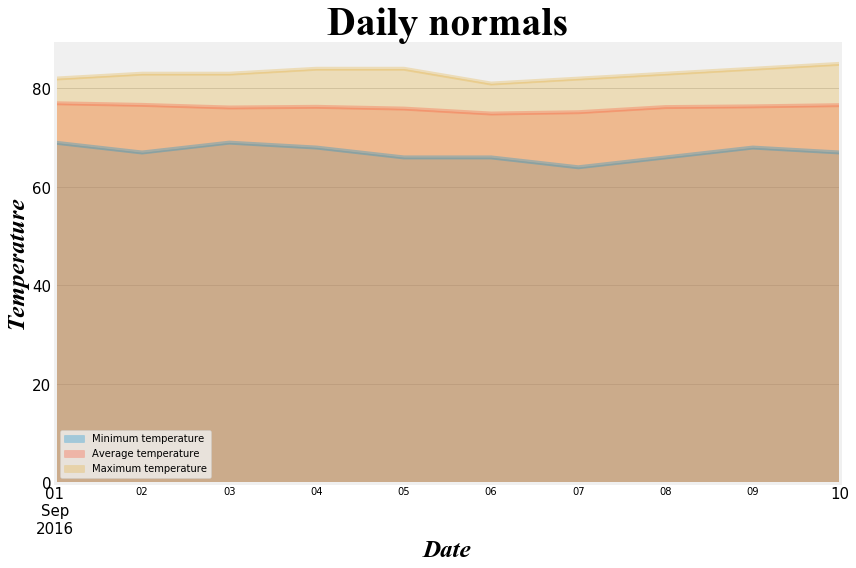

In [46]:
# Plot the daily normals as an area plot with `stacked=False`
day_trip_normals_df.plot.area(stacked=False,figsize = (12,8),alpha=0.3)
plt.title('Daily normals',family = 'Times New Roman',fontsize = 40)
plt.ylabel('Temperature',style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.xlabel('Date',style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.yticks(np.arange(0,100,step = 20),fontsize = 15)
plt.xticks(fontsize = 15)
plt.tight_layout()
plt.savefig("Temperature_analysis2.png")
plt.show()